<font face="B Mitra" size=4>
<div dir=rtl align=center>

<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">

<br>
<font size=2>
<b>دانشگاه صنعتی امیرکبیر - دانشکده ریاضی و علوم کامپیوتر</b>
</font>

<br>
<font size=6>
<b>مقدمه‌ای بر پردازش تصویر</b>
</font>

<br>
<hr/>
<font size=6>
<b>کارگاه پنجم: تبدیلات تصویر و مقدمات هیستوگرام در OpenCV</b>
</font>

<br>
استاد: دکتر مصطفی شمسی

<br>
طراح:‌ پیمان پاک نژاد

<hr>
</div>
</font>


# <!DOCTYPE html>
<html dir="rtl" lang="fa">
<font face="B Mitra" size=7>
<div dir="rtl">کتابخانه‌های مورد نیاز</div>
</font>
<font face="B Mitra" size=5>
<div dir="rtl">صرفا سلول زیر را اجرا کنید</div>
</font>

In [1]:
import cv2
import requests # For reading image from URL
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image

def download_image_from_url(url):
    filename, ext = url.split("/")[-1].split(".")
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    # Check if the request was successful (status code 200 indicates success)
    if response.status_code == 200:
        # Get the content of the response (the image data)
        image_data = response.content
        # Specify the path where you want to save the image
        save_path = f"{filename}.{ext}"  # Replace with the desired file name and location
        # Open a binary file in write mode and write the image data to it
        with open(save_path, "wb") as file:
            file.write(image_data)
        print(f"Image downloaded and saved as {save_path}")
        return cv2.imread(save_path)
    else:
        print(f"Failed to download the image. Status code: {response.status_code}")

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال اول-الف</dir>
</b>
</font>


<font face="B Mitra" size=5>
    <div dir="rtl">
        <b>
        <p>تبدیلات شدت نقطه‌ای، یا تغییرات نقطه‌ای در داده‌های تصویری، روش‌های موثری هستند برای اصلاح یا بهبود کیفیت تصاویر دیجیتال. این تکنیک‌ها شامل تنظیم روشنایی، کنتراست و تصحیح رنگ به صورت نقطه به نقطه بر روی تصویر است. با اعمال این تبدیلات، تصاویری که شاید در ابتدا کدر، بی‌زندگی یا نامتعادل به نظر می‌رسند، می‌توانند به شکل چشمگیری با وضوح و دقت رنگی بهتری نمایش داده شوند. مثلاً، با افزایش کنتراست، جزئیات بیشتری در نواحی تیره و روشن تصویر آشکار می‌شود، و با تنظیمات رنگی می‌توان تعادل رنگ‌ها را برای نمایش دقیق‌تر واقعیت تصحیح کرد. این تبدیلات می‌توانند به صورت دستی یا خودکار و با بهره‌گیری از الگوریتم‌های  که نمایه‌های رنگی و شدت نور تصویر را تجزیه و
        تحلیل می‌کنند، اجرا شوند
        .در بخش اول این تمرین به برخی از روش ها خواهیم پرداخت</p>
        </b>
    </div>
</font>


<font face="B Mitra" size=6>
<b>
<div dir="rtl">هیستوگرام</dir>
</b>
</font>


<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
        <p>هیستوگرام تصویر، که نموداری از توزیع شدت‌های روشنایی یا رنگ‌ها در یک تصویر است، ابزار مهمی برای درک اطلاعات مربوط به کنتراست و تعادل نور در تصویر می‌باشد. این اطلاعات به عکاسان و ویراستاران کمک می‌کند تا بهینه‌سازی های مورد نیاز بر روی تصاویر را شناسایی و اعمال کنند، و از این طریق کیفیت بصری نهایی تصویر را ارتقاء دهند.</p>
        </b>
        <br/>
        </font>
        <font face="B Mitra" size=4.5>
        <b>
        هیستوگرام را برای تصاویر سیاه و سفید و رنگی زیر رسم کرده و کنتراست روشنایی و رنج دینامیکی را تحلیل کنید
        </b>
        </font>
    </div>
</font>

Image downloaded and saved as A.jpg


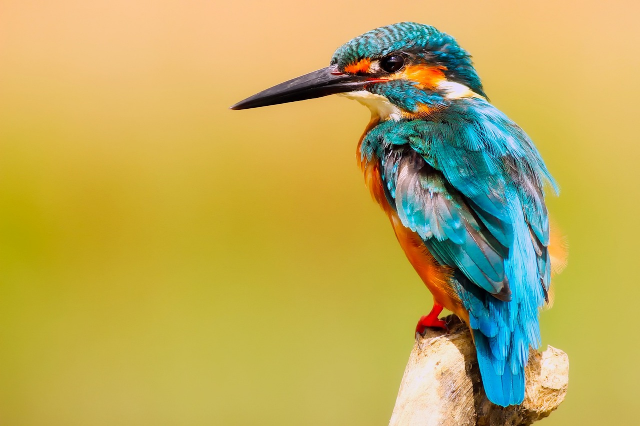

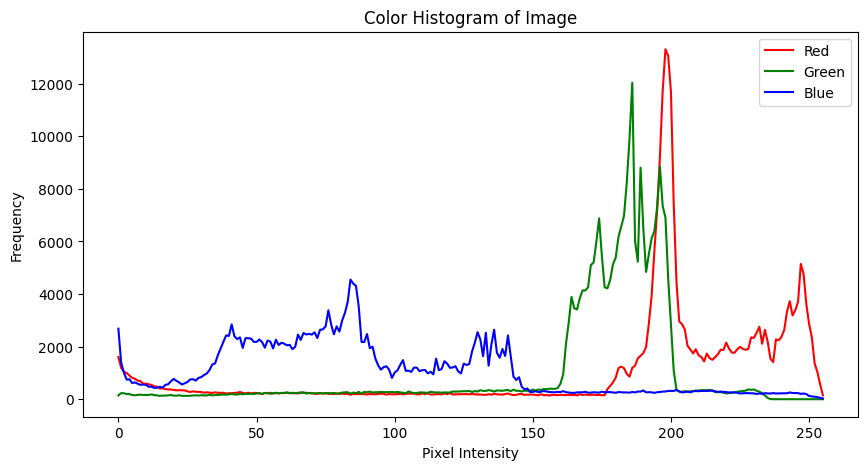

In [3]:
import matplotlib.pyplot as plt

# Load the input image
download_image_from_url("https://i.ibb.co/tYkStWD/A.jpg")
original_image_path = '/content/A.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)

# Display the original image
cv2_imshow(image)

# Convert the image to RGB color space
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate the histogram for each color channel
hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(10, 5))
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Color Histogram of Image')
plt.legend()
plt.show()

 <div dir="rtl">
 کنتراست روشنایی به تفاوت بین بیشترین و کمترین مقدار روشنایی در یک تصویر اطلاق
 می‌شود. رنج دینامیکی نیز به عرض بازه مقادیر روشنایی در تصویر اشاره دارد. هرچه کنتراست روشنایی و رنج دینامیکی بیشتر باشد، تصویر دارای تفاوت بیشتری در مقادیر روشنایی است و جزئیات بیشتری در تصویر قابل مشاهده خواهند بود.

 از آنجایی که قله ها در عکس زیاد بوده و مقادیر بالایی دارند می توانیم بفهمیم که کنتراست تصویر بالا می باشد و همینطور روشنایی بالایی دارد.

اگر به گسترش value های پیکسل ها دقت کنیم، می توانیم رنج دینامیکی را تشخیص بدهیم.
به نظر می رسد در اینجا رنگ آبی رنج دینامیکی گسترده تری دارد زیرا قرمز و سبز در برخی جاها به صفر می رسند. در واقه به نظر می آید قرمز و سبز در بیشتر عکس صفر یا نزدیک به صفر هستند اما در پیکسل های راستی مقادیر آن ها بالا می رود و به قله های خود نیز می رسند.

 </div>

Image downloaded and saved as img.jpg


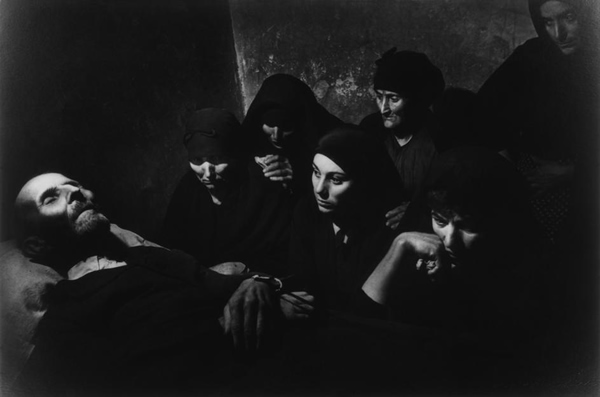

In [4]:
# Load the input image
download_image_from_url("https://i.ibb.co/HTn3gZx/img.jpg")
original_image_path = '/content/img.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 1, height // 1), interpolation=cv2.INTER_LINEAR)
# Display the original image
cv2_imshow(image)

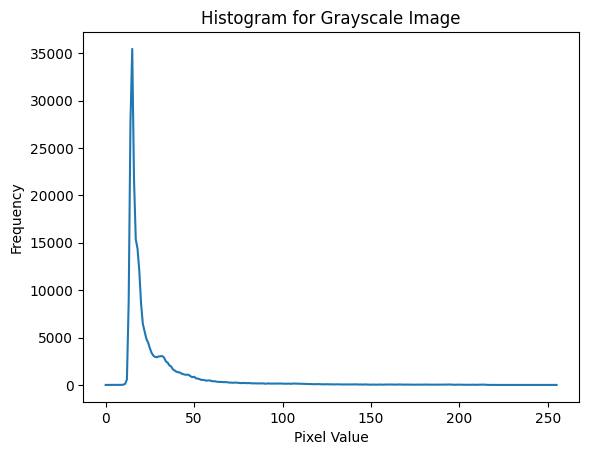

In [5]:
# Calculate histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot histogram
plt.plot(hist)
plt.title('Histogram for Grayscale Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

 <div dir="rtl">
طبق هیستوگرام می توان دریافت که عکس روشنایی کمتری دارد اما به علت قله با مقدار زیاد، کنتراست تصویر بالا می باشد.

همینطور چون قله در سمت چپ است پس نشان می دهد رنگ های تیره تر هستند.

همینطور مشخص است که رنج دینامیکی بسیار کمی دارد و مقادیر پیکسل ها اصلا گسترده نمی باشند.

</div>

Image downloaded and saved as B.jpg


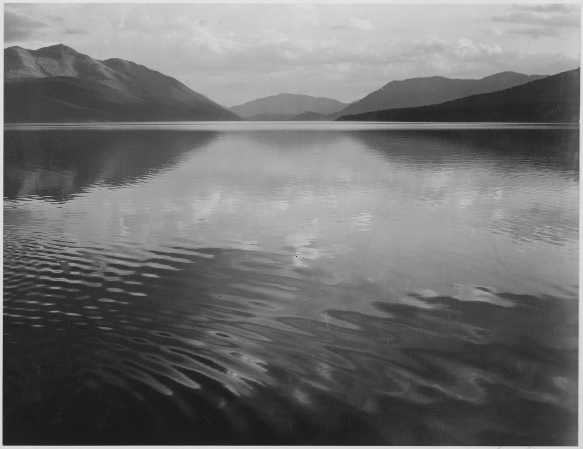

In [6]:
# Load the input image
download_image_from_url("https://i.ibb.co/7C0HcYV/B.jpg")
original_image_path = '/content/B.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)
# Display the original image
cv2_imshow(image)

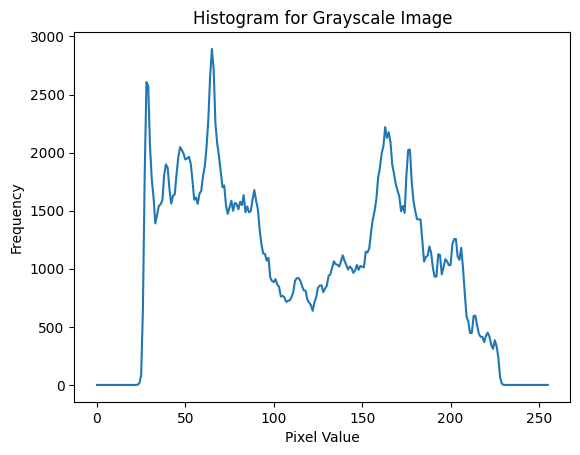

In [7]:
# Calculate histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot histogram
plt.plot(hist)
plt.title('Histogram for Grayscale Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

 <div dir="rtl">
نسبت به عکس قبل تیرگی کمتری دارد ولی باز هم بیشتر قله ها در سمت چپ بوده و عکس تیره است.
به علت داشتن قله های بیشتر و دامنه گسترده تر عکس روشن تر است.

اختلاف بین مقادیر پیکسل ها کمتر بوده و در نتیجه کنتراست کمتری از عکس قبلی دارد.
همینطور از آنجایی که pixel value ها گسترده تر هستند پس رنج دینامیکی آن بسیار بیشتر از عکس قبلی می باشد.

</div>

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال اول-ب</dir>
</b>
</font>



<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
            بهبود کنتراست
        </b>
    </div>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
        <p>
            بهبود کنتراست در تصاویر به معنی افزایش تفاوت شدت‌های نوری بین نقاط تاریک و روشن آن است، که منجر به تصاویر واضح‌تر و با جزئیات بیشتر می‌شود. روش‌های مختلفی برای این منظور وجود دارد، از جمله استفاده از توابع تبدیل خطی که دامنه شدت‌های را گسترش می‌دهد و هیستوگرام تصویر را فراگیرتر می‌کند.
            <br/>
            <br/>
            <font face="B Mitra" size=4.5>
            با استفاده از توابع تبدیل خطی که در درس آموختید نگاتیو تصویر زیر را به تصویر مناسب تبدیل کنید.
            </font>
        </p>
    </div>
    </b>
</font>

Image downloaded and saved as negative.png


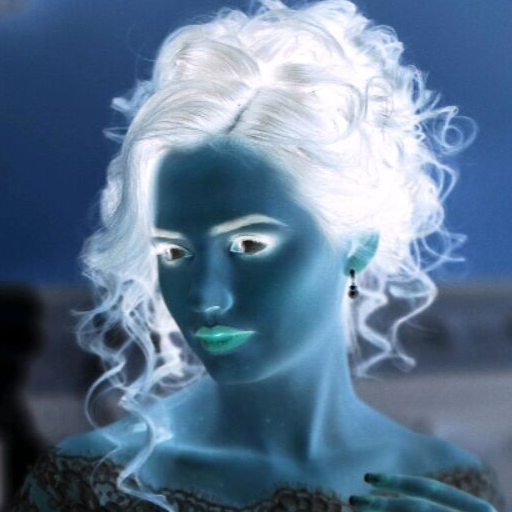

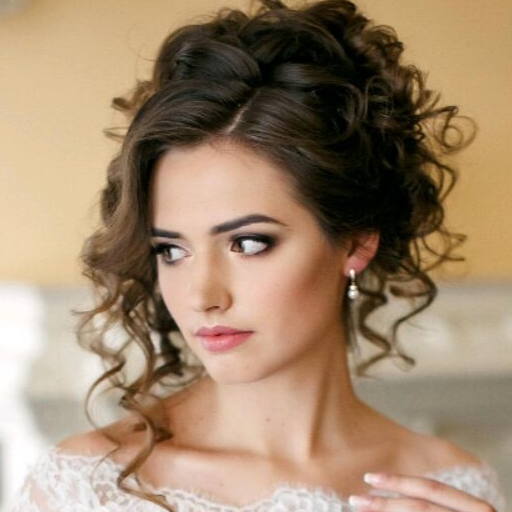

In [9]:
# Load the input image
download_image_from_url("https://i.ibb.co/pnFJy5w/negative.png")
original_image_path = '/content/negative.png'
image = cv2.imread(original_image_path)

cv2_imshow(image)

image2 = cv2.merge([255 - image[:, :, 0], 255 - image[:, :, 1], 255 - image[:, :, 2]])

cv2_imshow(image2)

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال دوم-الف</dir>
</b>
</font>


<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
            تابع تبدیل شدت لگاریتمی
        </b>
    </div>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
         <p>تابع تبدیل لگاریتمی در پردازش تصاویر با تأکید بر نمایش جزئیات در ناحیه‌های تاریک استفاده می‌شود. این تبدیل با استفاده از لگاریتم، شدت‌های پایین تصویر را افزایش داده و کنتراست را در این نواحی بهبود می‌بخشد، منجر به آشکارسازی بهتر جزئیات می‌شود.
         <br/><br/>
         <font face="B Mitra" size=4.5>
    این تابع را بر روی تصویر زیر اعمال کرده و تصویر جدید و هیستوگرام را رسم کنید.
        </font>
        </p>
    </div>
    </b>
</font>

Image downloaded and saved as Image.jpg


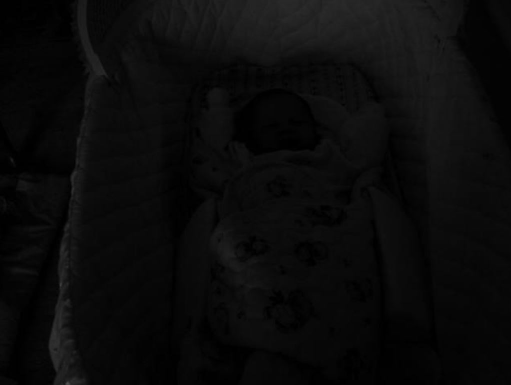

In [10]:
# Load the input image
download_image_from_url("https://i.ibb.co/8Pkw5F4/Image.jpg")
original_image_path = '/content/Image.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)
# Display the original image
cv2_imshow(image)

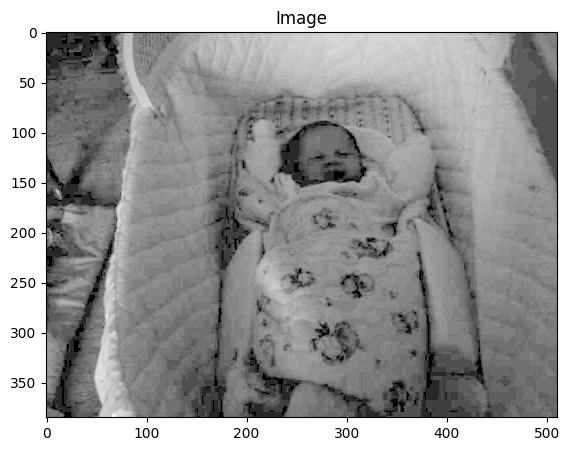

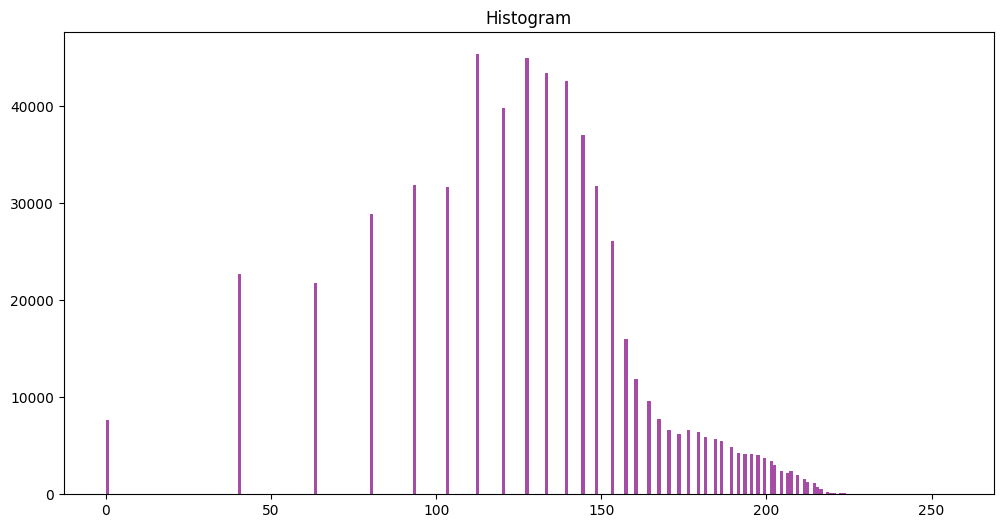

In [22]:
import matplotlib.pyplot as plt

image_float = np.float32(image)

c = 255 / np.log(1 + np.max(image_float))
logarithmic_image = c * (np.log(image_float + 1))

logarithmic_image = np.uint8(logarithmic_image)

plt.figure(figsize=(10, 5))
plt.title('Image')
plt.imshow(cv2.cvtColor(logarithmic_image, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(12, 6))
plt.title('Histogram')
plt.hist(logarithmic_image.flatten(), 256, [0, 256], color='purple', alpha=0.7, label='Logarithmic Image')
plt.show()

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال دوم-ب</dir>
</b>
</font>

<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
کشش هیستوگرام        </b>
    </div>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
          <p>کشش هیستوگرام رویکردی است که دامنه شدت‌های موجود در تصویر را فراگیر می‌کند تا کنتراست را افزایش دهد؛ این کار با کشیدن انتهاهای هیستوگرام تصویر و توزیع دوباره شدت‌ها در کل دامنه ممکن انجام می‌شود. در مقابل، مسطح‌سازی هیستوگرام به فرآیند تنظیم توزیع شدت نور در هیستوگرام اطلاق می‌گردد به گونه‌ای که تمامی شدت‌ها بطور یکنواخت در دسترس باشند، این امر باعث بهبود کنتراست کلی در تصویر می‌شود.<br>
    این دو روش را بر روی تصویر قبل اعمال کرده و هیستوگرام آنهارا رسم کنید(پیاده سازی این دو روش باید توسط خود شما صورت بگیرد)
    </div>
    </b>
</font>

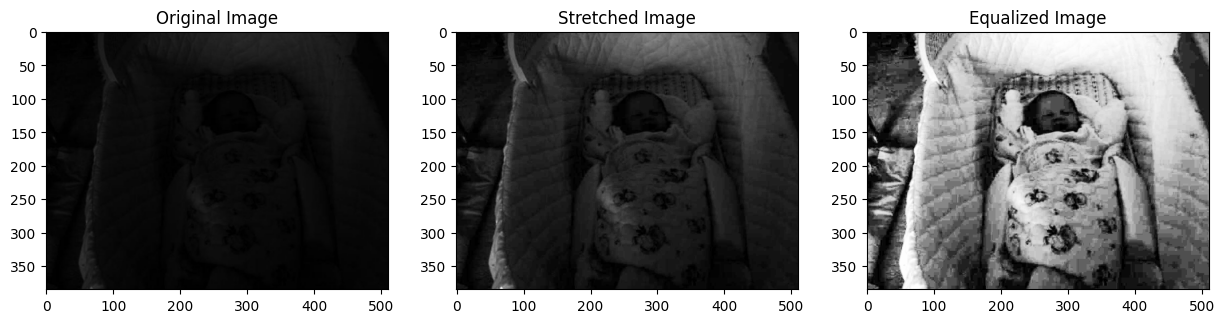

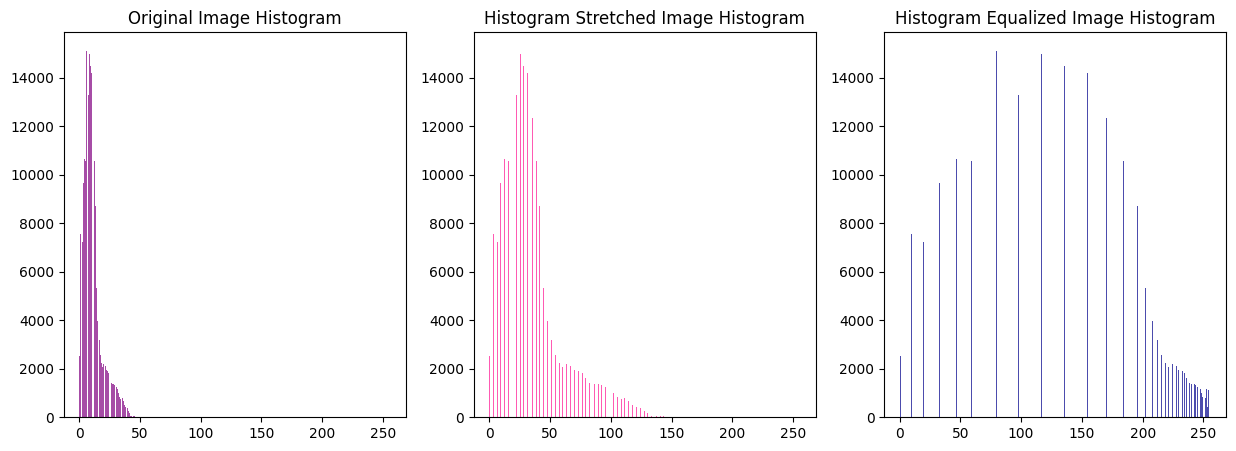

In [32]:
def equalization(channel):
    # Calculate the histogram
    histogram, _ = np.histogram(channel.flatten(), 256, [0, 256])

    # Calculate the cumulative distribution function (CDF)
    cdf = histogram.cumsum()

    # Normalize the CDF to the range [0, 255]
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())

    # Apply the equalization to the channel
    equalized_channel = np.interp(channel.flatten(), range(256), cdf_normalized).reshape(channel.shape)

    return equalized_channel.astype(np.uint8)

def stretching(original, min_desired=0, max_desired=255):

    hist, bins = np.histogram(original.flatten(), 256, [0, 256])

    min = np.min(original)
    max = np.max(original)

    defualt =  (max_desired - min_desired) + min_desired

    stretched = ((original - min) / (max - min)) * defualt

    stretched = stretched.astype(np.uint8)

    return stretched

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
stretched = stretching(gray)
equalized = equalization(gray)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(stretched, cmap='gray'), plt.title('Stretched Image')
plt.subplot(1, 3, 3), plt.imshow(equalized, cmap='gray'), plt.title('Equalized Image')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.hist(gray.flatten(), 256, [0, 256], color='purple', alpha=0.7, rwidth=0.8)
plt.title('Original Image Histogram')

plt.subplot(1, 3, 2), plt.hist(stretched.flatten(), 256, [0, 256], color='deeppink', alpha=0.7, rwidth=0.8)
plt.title('Histogram Stretched Image Histogram')

plt.subplot(1, 3, 3), plt.hist(equalized.flatten(), 256, [0, 256], color='darkblue', alpha=0.7, rwidth=0.8)
plt.title('Histogram Equalized Image Histogram')

plt.show()

<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
            فیلتر
        </b>
    </div>
</font>


<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
          <p>در پردازش تصویر، فیلترها عناصر حیاتی هستند که برای اصلاح، بهبود و استخراج اطلاعات از تصاویر استفاده می‌شوند. فیلترهای خطی مانند فیلتر میانگین  و فیلتر گوسی  برای هموارسازی تصویر و کاهش نویز بکار می‌روند، در حالی که فیلترهای لبه‌یاب مانند Sobel یا Canny برای شناسایی لبه‌ها و خطوط در تصاویر استفاده می‌شوند. همچنین، فیلترهای غیرخطی مانند میانه  می‌توانند نویز نقطه‌ای را کاهش دهند بدون اینکه لبه‌های تصویر مبهم شوند. این فیلترها از طریق عملیات کانولوشن یا ماسک‌های فیلتر بر روی پیکسل‌ها پیاده‌سازی شده و نتایج متنوعی را برای اهداف مختلف پردازش تصویر ارائه می‌دهند.<br>
    در ادامه تمرین به این مبحث خواهیم پرداخت.
</p>
    </div>
    </b>
</font>

Image downloaded and saved as D.jpg


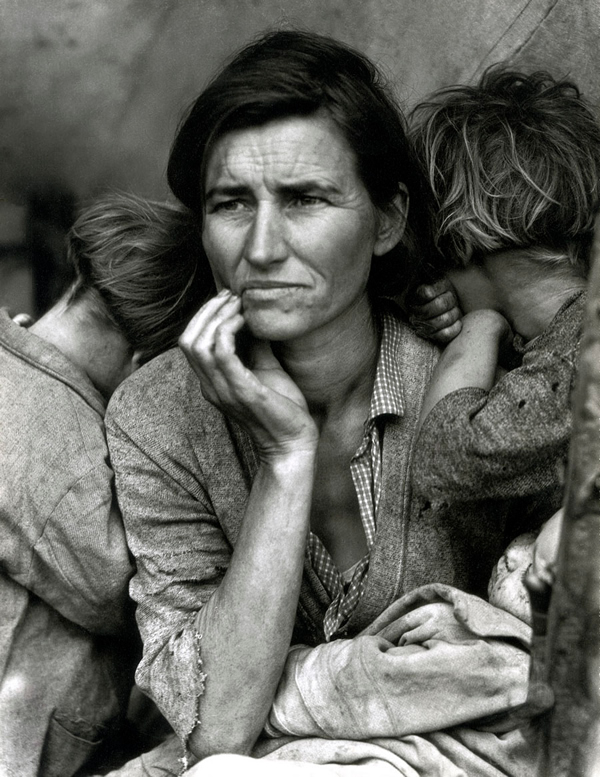

In [33]:
# Load the input image
download_image_from_url("https://i.ibb.co/QXQx81x/D.jpg")
original_image_path = '/content/D.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال سوم-الف</dir>
</b>
</font>

<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
            پیاده‌سازی
        </b>
    </div>
</font>



<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
          <p>تابعی بنویسید که با دریافت یک ماتریس ماسک و یک تصویر فیلتر زیر را بر روی آن اعمال کند.<br>
<br>
<img src="https://i.ibb.co/3sWQMkP/kernel.jpg" alt="kernel" width="150">
    <br>الف) مقادیر ده پیکسل دلخواه از ماتریس را قبل و بعد از اعمال فیلتر مقایسه کنید.<br>
    <br>
    ب) آیا این تابع برای سایر فیلتر ها نیز قابل استفاده است؟ تغییرات لازم را برای قابل استفاده ساختن این تابع برای انواع تصاویر و فیلتر ها اعمال کنید.
</p>
    </div>
    </b>
</font>

الف)

In [37]:
def filter(image, matrix):
    height, width, _ = image.shape
    filter_size = len(matrix)

    filtered_image = np.zeros_like(image)

    for c in range(image.shape[2]):
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                filtered_image[i, j, c] = np.sum(image[i - 1:i + 2, j - 1:j + 2, c] * matrix)

    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image.astype(np.uint8)

matrix = [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
]

filtered_image = filter(image, matrix)

np.random.seed(0)
random_pixels = np.random.randint(0, min(image.shape[0], image.shape[1]), size=(10, 2))

for pixel in random_pixels:
    r, c = pixel
    original_value = image[r, c]
    filtered_value = filtered_image[r, c]
    print(f"Pixel at ({r}, {c}): Before={original_value}, After={filtered_value}")


Pixel at (559, 192): Before=[123 129 128], After=[26 33 33]
Pixel at (359, 9): Before=[208 213 214], After=[229 234 233]
Pixel at (277, 599): Before=[ 99 111 111], After=[0 0 0]
Pixel at (70, 472): Before=[127 132 131], After=[120 125 124]
Pixel at (396, 314): Before=[55 63 62], After=[66 74 73]
Pixel at (486, 551): Before=[36 43 40], After=[62 74 71]
Pixel at (87, 174): Before=[90 96 95], After=[87 93 92]
Pixel at (537, 72): Before=[105 110 109], After=[44 47 48]
Pixel at (115, 431): Before=[27 33 32], After=[209 215 214]
Pixel at (448, 99): Before=[141 148 145], After=[141 151 144]


ب)

In [38]:
def filter(image, matrix):
    height, width, _ = image.shape
    filter_size = len(matrix)

    matrix = np.array(matrix)

    if matrix.shape[0] != matrix.shape[1]:
      raise ValueError("Matrix must be a square matrix.")

    if matrix.shape[0] % 2 == 0:
        raise ValueError("Matrix must be a square matrix with an odd size.")

    filtered_image = np.zeros_like(image)

    for c in range(image.shape[2]):
        for i in range(filter_size // 2, height - filter_size // 2):
            for j in range(filter_size // 2, width - filter_size // 2):
                filtered_image[i, j, c] = np.sum(image[i - filter_size // 2:i + filter_size // 2 + 1,
                                                        j - filter_size // 2:j + filter_size // 2 + 1, c] * matrix)

    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image.astype(np.uint8)

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال سوم-ب</dir>
</b>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
          <p>فیلتر میانگین یک تکنیک پردازش تصویر است که برای کاهش نویز از تصاویر استفاده می‌شود. این فیلتر با محاسبه میانگین مقادیر شدت پیکسل‌های همسایه برای هر پیکسل و جایگزینی این میانگین با مقدار پیکسل مرکزی، نویز را می‌کاهد، که این فرآیند منجر به هموار شدن کلی تصویر می‌شود. با این حال، کاربرد این فیلتر ممکن است با کاهش جزئیات دقیق نیز همراه باشد.<br/><br/>
    این فیلتر را پیاده سازی کرده و بر روی تصویر زیر اعمال کنید(با ابعاد 3*3 و 3*4).
    
</p>
    </div>
    </b>
</font>

Image downloaded and saved as E.jpg


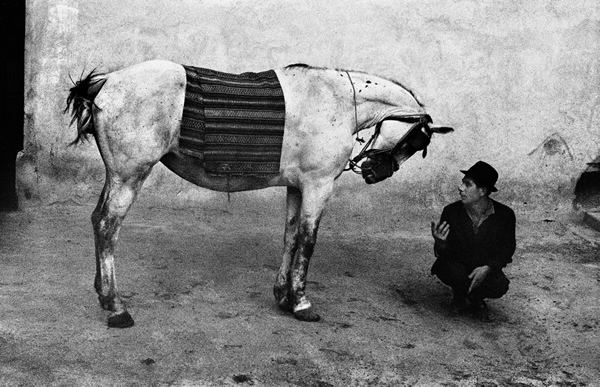

In [39]:
# Load the input image
download_image_from_url("https://i.ibb.co/sbtsv5z/E.jpg")
original_image_path = '/content/E.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

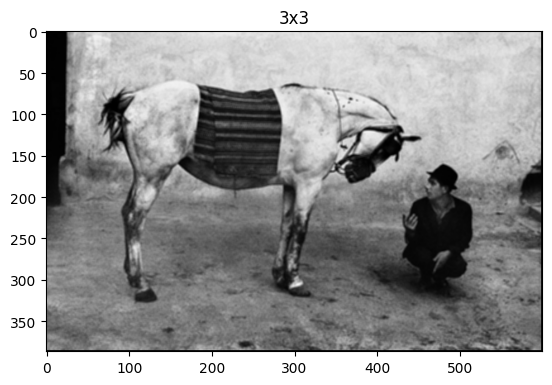

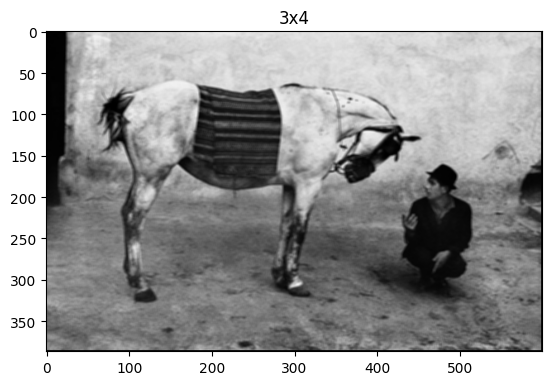

In [41]:
def apply_average_filter_color(image, kernel_size):
    height, width, channels = image.shape
    result = np.zeros((height, width, channels), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Extract the 3x3 or 3x4 neighborhood for each channel
            neighborhood = image[i-1:i+2, j-1:j+kernel_size-1, :]

            # Calculate the average for each channel and update the result
            result[i, j, :] = np.mean(neighborhood, axis=(0, 1))

    return result

filtered_image_3x3 = apply_average_filter_color(image, 3)

# Display the filtered image
plt.imshow(cv2.cvtColor(filtered_image_3x3, cv2.COLOR_BGR2RGB))
plt.title('3x3')
plt.show()

# Apply the average filter with a 3x4 kernel
filtered_image_3x4 = apply_average_filter_color(image, 4)

# Display the filtered image
plt.imshow(cv2.cvtColor(filtered_image_3x4, cv2.COLOR_BGR2RGB))
plt.title('3x4')
plt.show()

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال چهارم</dir>
</b>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
           <p>فیلتر سوبل یک تکنیک مرسوم در تشخیص لبه‌های تصویر است که می‌تواند جزئیات و تغییرات شدت روشنایی را در تصاویر به خوبی شناسایی کند. این رویکرد از دو کرنل (یکی برای افقی و دیگری برای عمودی) استفاده می‌کند تا گرادیان تصویر را در هر جهت حساب کرده و شدت لبه‌ها را مشخص نماید. فیلتر سوبل از طریق عملیات کانولوشن کرنل‌ها با تصویر ورودی سرعت بالایی در محاسبه دارد. نتایج بدست آمده از این فیلتر به ویژه برای شناخت لبه‌ها در شرایطی که تغییرات روشنایی تدریجی است، مفید است. استفاده از این فیلتر معمولاً در مراحل اولیه تشخیص الگوها و تجزیه و تحلیل تصاویر استراتژیک می‌باشد، زیرا شناسایی صحیح لبه‌ها یکی از پیش‌نیازهای اصلی برای درک بهتر تصویر است.<br/><br/>
    الگوریتم سوبل را پیاده سازی کرده و بر روی تصویر زیر اعمال کنید.
</p>
    </div>
    </b>
</font>

In [42]:
def sobel_filter(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    sobel_x = convolve(image, sobel_x_kernel)
    sobel_y = convolve(image, sobel_y_kernel)

    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    return gradient_magnitude

def convolve(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape

    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')

    result = np.zeros((height, width))

    for i in range(1, height + 1):
        for j in range(1, width + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            result[i-1, j-1] = np.sum(region * kernel)

    return result

Image downloaded and saved as F.jpg


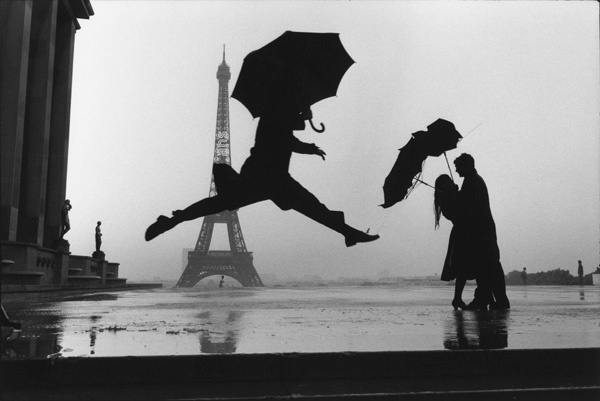

In [43]:
download_image_from_url("https://i.ibb.co/KXZrVWz/F.jpg")
original_image_path = '/content/F.jpg'
image = cv2.imread(original_image_path)

cv2_imshow(image)

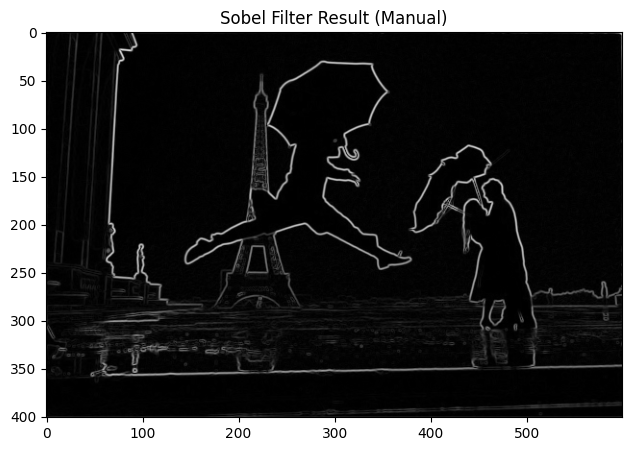

In [44]:
gradient_magnitude_manual = sobel_filter(image)

plt.figure(figsize=(10, 5))
plt.imshow(gradient_magnitude_manual, cmap='gray')
plt.title('Sobel Filter Result (Manual)')

plt.show()

<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
            سوبل
        </b>
    </div>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
           <p>
    در برخی مواقع ترکیب روش هاو الگوریتم های مختلف باعث بهبود نتایج بدست آمده خواهد شد.<br>
    در این الگوریتم سوبل را بر روی تصویر اعمال کنید. سپس یکی از روش های بهبود کنتراست را یر روی تصویر اعمال کرده و مجددا لبه یابی را انجام دهید. نتایج بدست آمده را با یکدیگر مقایسه کنید.
</p>
    </div>
    </b>
</font>

Image downloaded and saved as img.jpg


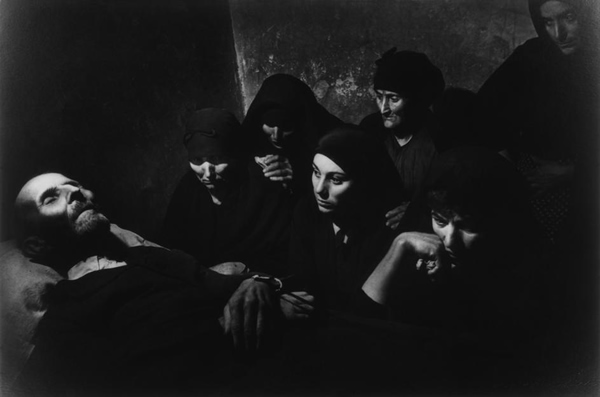

In [46]:
# Load the input image
download_image_from_url("https://i.ibb.co/HTn3gZx/img.jpg")
original_image_path = '/content/img.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

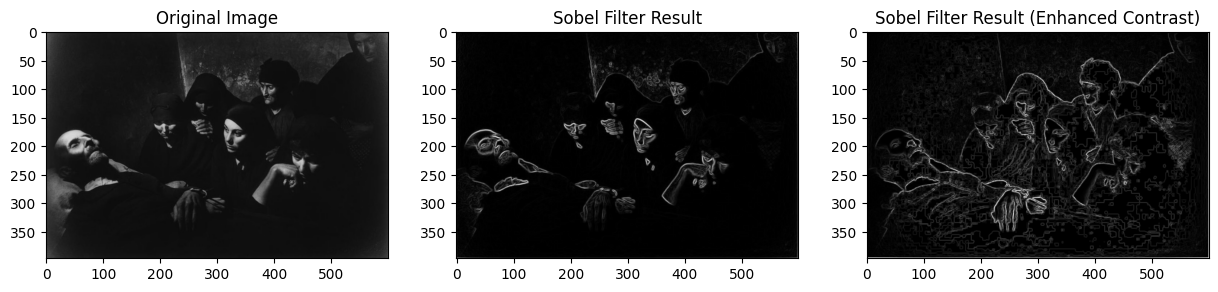

In [48]:
sobel_result = sobel_filter(image)

contrast_enhanced_image = equalization(image)

sobel_result_enhanced = sobel_filter(contrast_enhanced_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel Filter Result')

plt.subplot(1, 3, 3)
plt.imshow(sobel_result_enhanced, cmap='gray')
plt.title('Sobel Filter Result (Enhanced Contrast)')

plt.show()

<div dir="rtl">
زمانی که کنتراست بالا رفته است  سوبل توانسته به دلیل این کنتراست بالاتر لبه های بیشتری شناسایی بکند. همانطور که مشاهده می کنیم لبه ها (مثلا انسان ها در تصویر) بهتر لبه یابی شده اند.
</div>